In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-23 14:54:22.400672: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-23 14:54:24.185358: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-23 14:54:24.388630: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:54:24.391214: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:54:24.391238: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-2

In [3]:
help(gp2.KUNet3Plus2D)

Help on class KUNet3Plus2D in module gp2.gp2.classifiers.k_unet3_plus2d:

class KUNet3Plus2D(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KUNet3Plus2D(input_size=(512, 512, 1), n_labels=1, filter_num_down=None, filter_num_skip=None, filter_num_aggregate=None, stack_num_down=1, stack_num_up=3, activation='ReLU', output_activation='Sigmoid', batch_norm=False, pool=True, unpool=True, deep_supervision=False, name='unet3plus', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Keras implementation of UNET 3+ with an optional ImageNet-trained backbone.
 |  
 |  Method resolution order:
 |      KUNet3Plus2D
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), n_labels=1, filter_num_down=None, filter_num_skip=None, filter_

In [4]:
R = Runner(verbose=True, 
           classifier='kunet3plus2d',
           discriminator='cnnplus',
           filter_num_down=[16, 32, 64, 128, 256], 
           filter_num_skip=[16, 16, 16, 16], 
           filter_num_aggregate=32, 
           stack_num_down=2, 
           stack_num_up=1, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=False, 
           pool=False, 
           unpool=False, 
           deep_supervision=False, 
           optimizer=None, 
           loss=None,
           metric=None
          )

KUNet3Plus2D: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fd944cf72e0>, <function binary_crossentropy at 0x7fd94cf88b80>, [<function Util.dice_coef at 0x7fd94cd0c940>]


2023-04-23 14:54:24.521359: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 14:54:24.801353: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:54:24.803769: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 14:54:24.813403: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible 

*** GP2  KUNet3Plus2D ***
Working directory: /tmp/tmpmrq3v2blGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmpmrq3v2blGP2', 'input_size': (512, 512, 1), 'n_labels': 1, 'filter_num_down': [16, 32, 64, 128, 256], 'filter_num_skip': [16, 16, 16, 16], 'filter_num_aggregate': 32, 'stack_num_down': 2, 'stack_num_up': 1, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': False, 'pool': False, 'unpool': False, 'deep_supervision': False, 'name': 'unet3plus', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fd944cf72e0>, 'loss': <function binary_crossentropy at 0x7fd94cf88b80>, 'metric': [<function Util.dice_coef at 0x7fd94cd0c940>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7fd941702820>}
Model summary:
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to             

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=3)

Weights OK!
******
Loop 0


2023-04-23 14:54:31.472292: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-23 14:54:31.491013: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-23 14:54:35.158975: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-23 14:54:35.781947: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-23 14:54:36.448479: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-23 14:54:36.448505: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-23 14:54:36.448560: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-23 14:54:36.466432: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-23 14:54:37.213035: I tensorflow/stream_exec

4/4 [==============================] - 43s 7s/step - loss: 0.6399 - dice_coef: 0.1784 - val_loss: 0.7103 - val_dice_coef: 0.1788


2023-04-23 14:55:16.489441: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.6400 - dice_coef: 0.1785 - val_loss: 0.7049 - val_dice_coef: 0.1771
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.6400 - dice_coef: 0.1784 - val_loss: 0.7013 - val_dice_coef: 0.1758
Model saved to: /tmp/tmpmrq3v2blGP2/unet3plus_0unet3plus_model
History saved to: /tmp/tmpmrq3v2blGP2/unet3plus_history_0.pkl
Testing the classifier...
Model saved to /tmp/tmpmrq3v2blGP2/cnnd_0.model
History saved to /tmp/tmpmrq3v2blGP2/cnnd_history_0.pickle
Testing the discriminator...
10/10 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 135 machine labels.
Machine labels [  1   2   8  11  15  22  27  28  32  34  35  36  37  38  40  44  45  46
  49  50  52  58  59  60  64  68  75  76  77  78  79  80  81  83  85  86
  91  93  95  96  97  99 100 101 102 104 105 108 114 116 121 122 123 124
 128 130 131 135 138 140 143 144 145 146 148 153 156 157 164 165 167 168
 170 173

Epoch 1/100
5/5 [==============================] - 14s 3s/step - loss: 0.6402 - dice_coef: 0.1779 - val_loss: 0.6981 - val_dice_coef: 0.1746
Epoch 2/100
5/5 [==============================] - 4s 861ms/step - loss: 0.6402 - dice_coef: 0.1785 - val_loss: 0.6980 - val_dice_coef: 0.1759
Epoch 3/100
5/5 [==============================] - 4s 874ms/step - loss: 0.6279 - dice_coef: 0.1853 - val_loss: 0.6959 - val_dice_coef: 0.1751
Epoch 4/100
5/5 [==============================] - 4s 850ms/step - loss: 0.6275 - dice_coef: 0.1853 - val_loss: 0.6940 - val_dice_coef: 0.1745
Epoch 5/100
5/5 [==============================] - 4s 865ms/step - loss: 0.6276 - dice_coef: 0.1850 - val_loss: 0.6925 - val_dice_coef: 0.1740
Epoch 6/100
5/5 [==============================] - 4s 863ms/step - loss: 0.6276 - dice_coef: 0.1851 - val_loss: 0.6911 - val_dice_coef: 0.1735


KeyboardInterrupt: 

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

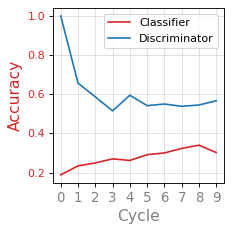

In [18]:
R.plot()

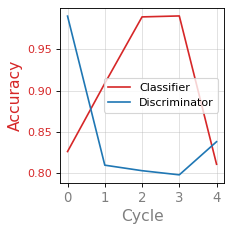

In [17]:
R.plot()